<a href="https://colab.research.google.com/github/vasanth-vara/MLproject/blob/main/student_mental_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Mental health analysis

### import packages

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


## read dataset

In [62]:
df = pd.read_csv('/content/Student Mental health.csv')

In [63]:
df


,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Output
0,0,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,0
1,1,21.0,Education,year 2,3.00 - 3.49,No,No,Yes,No,0
2,1,19.0,Doctor,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,1
3,0,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,0
4,1,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,0
97,1,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,1
98,0,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,1
99,0,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,0


### Exploratory Data Analysis¶


In [64]:
df.shape

(101, 10)

In [65]:
df.describe()


,Choose your gender,Age,Output
count,101.000000,100.00000,101.000000
mean,0.257426,20.53000,0.267327
std,0.439397,2.49628,0.444772
min,0.000000,18.00000,0.000000
25%,0.000000,18.00000,0.000000
50%,0.000000,19.00000,0.000000
75%,1.000000,23.00000,1.000000
max,1.000000,24.00000,1.000000


In [66]:
df.head(10)


,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Output
0,0,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,0
1,1,21.0,Education,year 2,3.00 - 3.49,No,No,Yes,No,0
2,1,19.0,Doctor,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,1
3,0,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,0
4,1,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,0
5,1,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,0
6,0,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,0
7,0,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,0
8,0,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,0
9,1,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,0


### missing value

In [67]:
df.isnull().sum()

Choose your gender            0
Age                           1
What is your course?          0
Your current year of Study    0
What is your CGPA?            0
Marital status                0
Do you have Depression?       0
Do you have Anxiety?          0
Do you have Panic attack?     0
Output                        0
dtype: int64

In [68]:
df['Age']=df['Age'].fillna(int(df['Age'].mean()))

In [69]:
df.isnull().sum()

Choose your gender            0
Age                           0
What is your course?          0
Your current year of Study    0
What is your CGPA?            0
Marital status                0
Do you have Depression?       0
Do you have Anxiety?          0
Do you have Panic attack?     0
Output                        0
dtype: int64

### find non duplicated courses in dataset

In [70]:
arr = df["What is your course?"].unique()

arr


array(['Engineering', 'Education', 'Doctor', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'BIT',
       'Marine science', 'KOE', 'Banking Studies',
       'Business Administration', 'Law', 'KIRKHS', 'Usuluddin ', 'TAASL',
       'Engine', 'ALA', 'Biomedical science', 'koe', 'Kirkhs', 'BENL',
       'Benl', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop',
       'Human Sciences ', 'Biotechnology', 'Communication ',
       'Diploma Nursing', 'Pendidikan Islam ', 'Radiography',
       'psychology', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe', 'Fiqh',
       'Islamic Education', 'Nursing ', 'Pendidikan Islam'], dtype=object)

### make some visualization to find answers

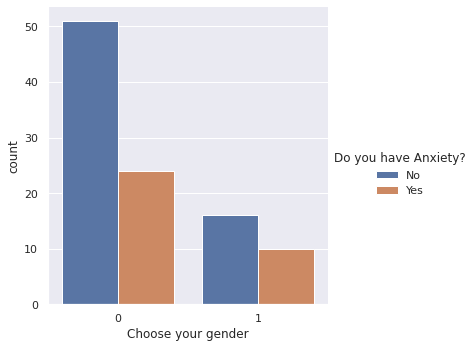

In [71]:
sns.catplot(x='Choose your gender',hue='Do you have Anxiety?',kind='count',data=df)

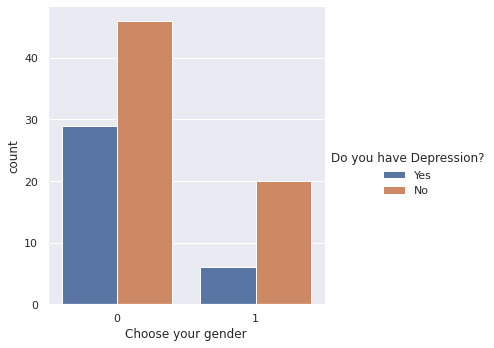

In [72]:
sns.catplot(x='Choose your gender',hue='Do you have Depression?',kind='count',data=df)

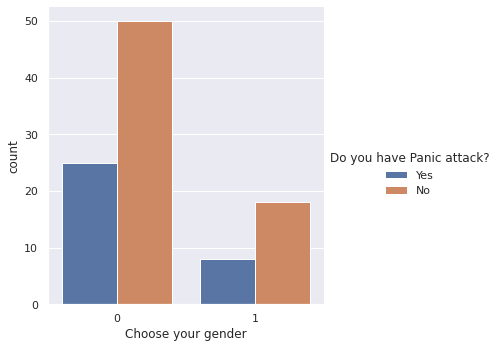

In [73]:
sns.catplot(x='Choose your gender',hue='Do you have Panic attack?',kind='count',data=df)

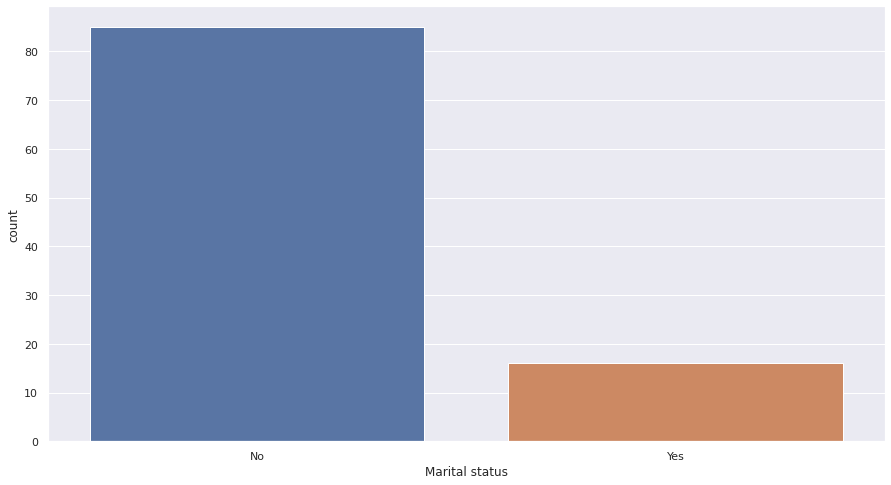

In [74]:
 sns.countplot(x="Marital status",data=df)

### so in this figures we see the female more senstive than male and have alot of Depression and the most of students are single 

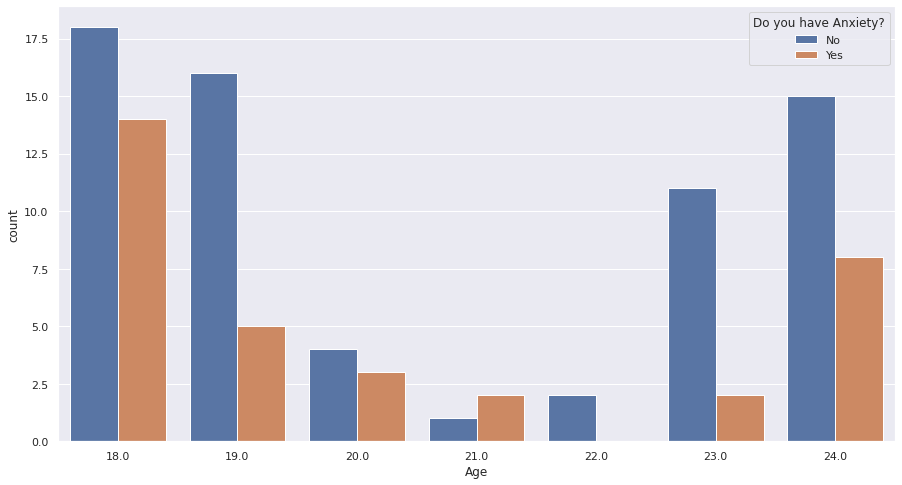

In [75]:
 sns.countplot(x="Age", hue='Do you have Anxiety?',data=df)

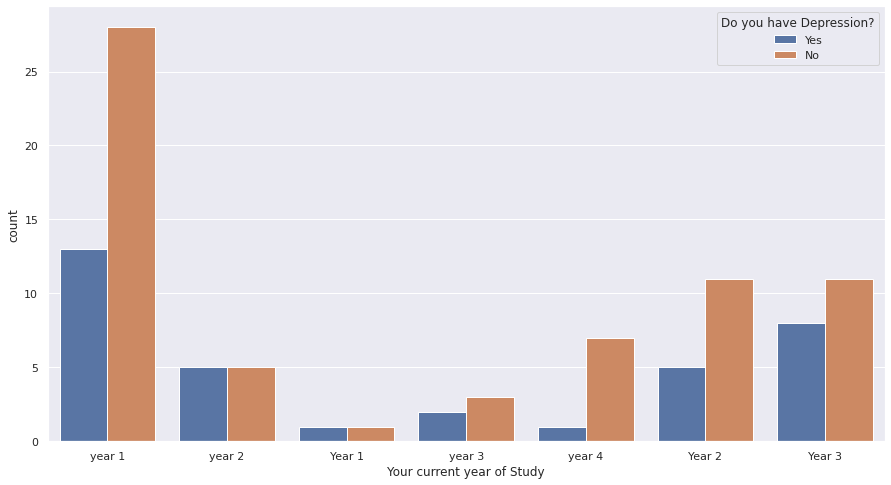

In [76]:
 sns.countplot(x="Your current year of Study", hue='Do you have Depression?',data=df)

### A lot of depression and anxiety come in the first year and his age is 18, which means that the student is afraid of the unknown and doubts the extent of his ability to choose his field of study.

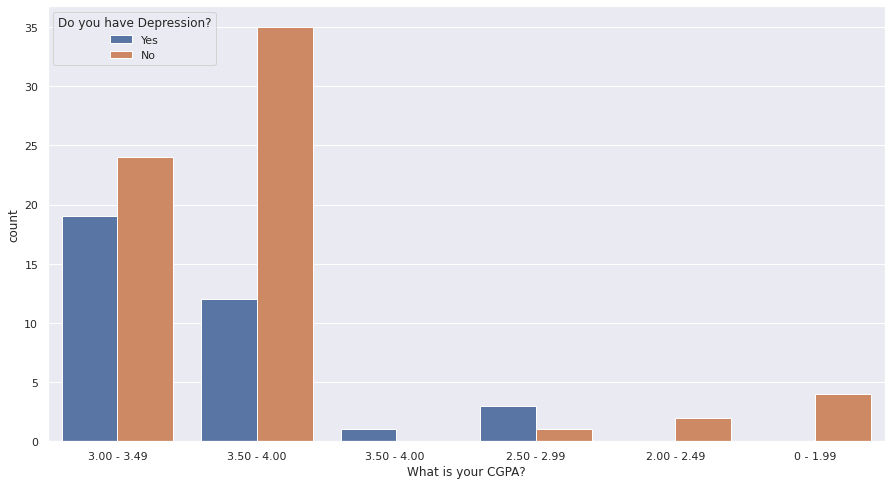

In [77]:
 sns.countplot(x="What is your CGPA?", hue='Do you have Depression?',data=df)

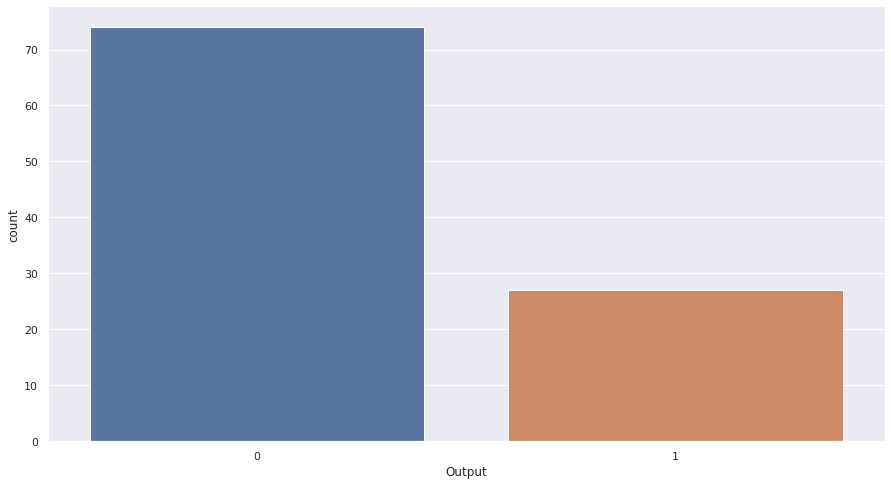

In [78]:
sns.countplot(x='Output', data=df)

### but the most of students have a high GPA which mean the Depression has a little effect on GPA

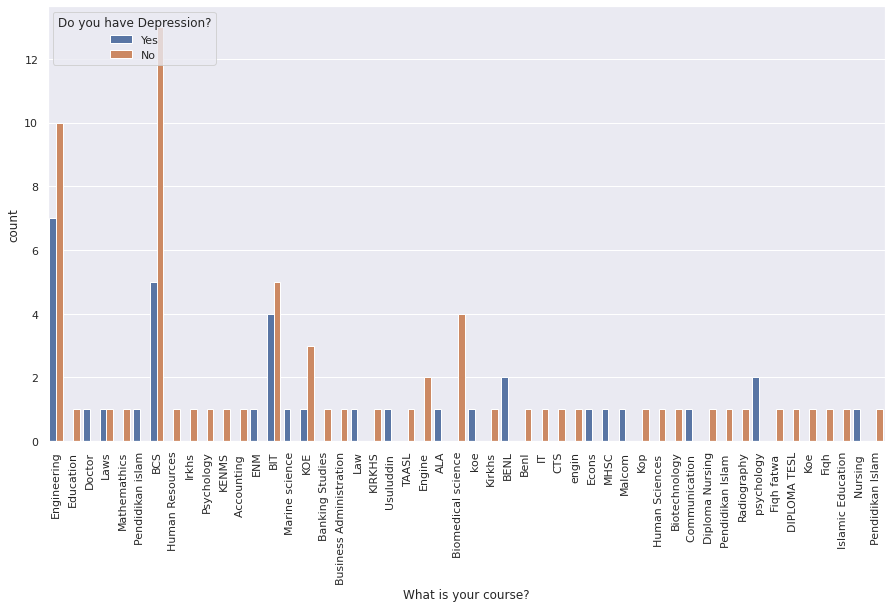

In [79]:
sns.set(rc = {'figure.figsize':(15,8)})
yr=sns.countplot(x='What is your course?',hue='Do you have Depression?',data=df)
yr.set_xticklabels(yr.get_xticklabels(),rotation=90);

In [80]:
classifier = KNeighborsClassifier()

df = pd.read_csv('/content/Student Mental health.csv')
X = df.drop(columns = 'Output', axis=1)
Y = df['Output']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X_train, Y_train)



     Choose your gender   Age What is your course? Your current year of Study  \
69                    0  24.0                  Kop                     year 4   
100                   1  20.0   Biomedical science                     Year 2   
54                    0  19.0                  BCS                     year 1   
60                    0  18.0                   IT                     Year 3   
89                    1  24.0          Engineering                     Year 2   
..                  ...   ...                  ...                        ...   
96                    0  21.0                  BCS                     year 1   
14                    0  18.0                KENMS                     Year 2   
79                    0  18.0          Engineering                     year 4   
84                    1  23.0          Radiography                     year 1   
28                    0  24.0                  BIT                     Year 3   

    What is your CGPA? Mari

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def fit(X, y=None, sample_weight=None):
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(101, 9) (80, 9) (21, 9)


In [106]:
def train(classifier,X,Y):
  classifier = KNeighborsClassifier()
  classifier.fit(X_train, Y_train)
  X_train_prediction = classifier.predict(X_train)
  training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
  print('Accuracy score of the training data : ', training_data_accuracy)
  return training_data_accuracy

print(classifier)

KNeighborsClassifier()


In [84]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

In [99]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray('a')

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

def predict(X):
  prediction = classifier.predict(input_data_reshaped)
  print(prediction)
  if (prediction[0] == 'maize'):
    print('The land is suitable for maize')
  elif(prediction[0]=='rice'):
    print('The land is suitable for rice')


In [97]:
import pickle
filename = 'mentalhealthdata.sav'
pickle.dump(classifier, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('mentalhealthdata.sav', 'rb'))

### clearly in this viz the most study field has alot of Depression is Engineering 

### Therefore, females are more sensitive than males, and students have more depression in the first year. To solve this problem, the field of study must be clearly defined for the student to have confidence in his choice and provide psychological support to students more in the first year and those of young ages and give support to whoes study Engineering

In [ ]:
df.describe()